In [95]:
import kagglehub
import os
import pandas as pd


In [96]:

# Download latest version
path = kagglehub.dataset_download("kathir1k/youtube-influencers-data")

print(os.path.join(path, os.listdir(path)[0]))


/Users/emirysaglam/.cache/kagglehub/datasets/kathir1k/youtube-influencers-data/versions/2/Youtube Influencer Analysis - Updated.csv


In [97]:
import chardet

with open(os.path.join(path, os.listdir(path)[0]), "rb") as f:
    result = chardet.detect(f.read(10000))

print(result['encoding'])



Windows-1252


In [98]:
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]), encoding=result['encoding'])
df[["Video Link", "Channel URL", "Date of Video Upload", "Creator Name"]]

Video Link  \
0          https://www.youtube.com/watch?v=_0fUOJ55gis   
1          https://www.youtube.com/watch?v=_70MSLPRfZI   
2    https://www.youtube.com/watch?v=_8gfCdt3H00&t=87s   
3          https://www.youtube.com/watch?v=_CkFNJgKsFs   
4          https://www.youtube.com/watch?v=_GFkHA5EZdE   
..                                                 ...   
900        https://www.youtube.com/watch?v=GS18WawA-t0   
901        https://www.youtube.com/watch?v=_tc_APkjH2Q   
902        https://www.youtube.com/watch?v=Xfj4osSYfhU   
903        https://www.youtube.com/watch?v=mGEHqwVz0eI   
904        https://www.youtube.com/watch?v=UGATpt0I4vA   

                                           Channel URL Date of Video Upload  \
0                  https://www.youtube.com/c/sriharick            7/29/2022   
1           https://www.youtube.com/c/ChaibisketTelugu            5/22/2022   
2    https://www.youtube.com/channel/UCcIUnCsBfONvb...             2/9/2021   
3                   https://www.youtube.com/c/trtworld            9/13/2022   
4                                      Vogue - YouTube            3/21/2017   
..                                                 ...                  ...   
900        https://www.youtube.com/c/SahilOnlineTVnews            9/29/2022   
901                https://www.youtube.com/sahilonline             8/6/2017   
902                https://www.youtube.com/sahilonline             1/3/2021   
903                https://www.youtube.com/sahilonline             3/6/2022   
904        https://www.youtube.com/c/SonySportsNetwork            9/25/2022   

             Creator Name  
0              srihari ck  
1             Chai Bisket  
2             Virda Warsi  
3                     TRT  
4                   Vogue  
..                    ...  
900  Sahil Online TV News  
901  Sahil Online TV News  
902  Sahil Online Bhatkal  
903  Sahil Online Bhatkal  
904   Sony Sports Network  

[905 rows x 4 columns]

## Data Manupilation

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Video Link                             905 non-null    object 
 1   Video Views                            905 non-null    object 
 2   Video Title                            905 non-null    object 
 3   Channel URL                            905 non-null    object 
 4   Creator Name                           894 non-null    object 
 5   Creator Gender                         591 non-null    object 
 6   Total Channel Subcribers               905 non-null    object 
 7   Total Chanel Views                     905 non-null    object 
 8   Duration of Video                      905 non-null    object 
 9   Duration in Seconds                    905 non-null    object 
 10  Date of Video Upload                   905 non-null    object 
 11  No of 

In [100]:
df.drop(columns=['Video Link','Intern Who Collected the Data'], inplace=True)

In [101]:
df[["Video Views","Total Channel Subcribers","Total Chanel Views","Duration in Seconds","No of Comments"]]

Video Views Total Channel Subcribers Total Chanel Views  \
0       146,059                    40200            7964284   
1       231,969                   920000          137535681   
2           878                      458              72945   
3         9,965                  1680000          541653219   
4    39,780,561                 12100000         3600496171   
..          ...                      ...                ...   
900       6,892                   594000          129926690   
901      16,554                   594000          129926690   
902      32,798                    23500            5104872   
903       1,503                    23500            5104872   
904     429,966                  3980000          728858923   

    Duration in Seconds No of Comments  
0              1,841.00            419  
1                864.00            189  
2                492.00              0  
3                 66.00             77  
4                460.00          28221  
..                  ...            ...  
900              827.00             15  
901              404.00              0  
902              384.00              0  
903              279.00              0  
904               81.00              0  

[905 rows x 5 columns]

In [102]:

df['Video Views'] = df['Video Views'].str.replace(',', '')
df['Video Views'] = pd.to_numeric(df['Video Views'], errors='coerce')


df['Total Channel Subcribers'] = df['Total Channel Subcribers'].str.replace(',', '')
df['Total Channel Subcribers'] = pd.to_numeric(df['Total Channel Subcribers'], errors='coerce')


df['Total Chanel Views'] = df['Total Chanel Views'].str.replace(',', '')
df['Total Chanel Views'] = pd.to_numeric(df['Total Chanel Views'], errors='coerce')


df['Duration in Seconds'] = df['Duration in Seconds'].str.replace(',', '')
df['Duration in Seconds'] = pd.to_numeric(df['Duration in Seconds'], errors='coerce')

df['No of Comments'] = df['No of Comments'].str.replace(',', '')
df['No of Comments'] = pd.to_numeric(df['No of Comments'], errors='coerce')



In [103]:
df[["Video Views","Total Channel Subcribers","Total Chanel Views","Duration in Seconds","No of Comments"]]

Video Views  Total Channel Subcribers  Total Chanel Views  \
0         146059                   40200.0        7.964284e+06   
1         231969                  920000.0        1.375357e+08   
2            878                     458.0        7.294500e+04   
3           9965                 1680000.0        5.416532e+08   
4       39780561                12100000.0        3.600496e+09   
..           ...                       ...                 ...   
900         6892                  594000.0        1.299267e+08   
901        16554                  594000.0        1.299267e+08   
902        32798                   23500.0        5.104872e+06   
903         1503                   23500.0        5.104872e+06   
904       429966                 3980000.0        7.288589e+08   

     Duration in Seconds  No of Comments  
0                 1841.0             419  
1                  864.0             189  
2                  492.0               0  
3                   66.0              77  
4                  460.0           28221  
..                   ...             ...  
900                827.0              15  
901                404.0               0  
902                384.0               0  
903                279.0               0  
904                 81.0               0  

[905 rows x 5 columns]

In [104]:
df.describe()

Video Views  Total Channel Subcribers  Total Chanel Views  \
count  9.050000e+02              9.030000e+02        8.960000e+02   
mean   5.447910e+07              1.043915e+07        2.235640e+09   
std    4.002179e+08              2.410166e+07        1.055352e+10   
min    2.300000e+01              3.400000e+01        3.600000e+01   
25%    2.013700e+05              3.270000e+05        3.599062e+07   
50%    1.293867e+06              2.100000e+06        2.475236e+08   
75%    9.002909e+06              9.300000e+06        1.267778e+09   
max    7.990990e+09              3.052000e+08        2.022970e+11   

       Duration in Seconds   No of Likes    Hashtags  No of Comments  \
count           905.000000  9.040000e+02  905.000000    9.050000e+02   
mean           1927.761326  5.840101e+05    1.030939    4.558636e+04   
std            6395.720819  2.959309e+06    1.835350    4.786907e+05   
min               0.000000  0.000000e+00    0.000000    0.000000e+00   
25%             314.000000  5.475000e+03    0.000000    2.280000e+02   
50%             645.000000  3.250000e+04    0.000000    1.221000e+03   
75%            1034.000000  1.845000e+05    2.000000    7.016000e+03   
max           62700.000000  4.900000e+07   28.000000    1.124480e+07   

       Maximum Quality of the Video  No of Videos the Channel  No of Playlist  \
count                    905.000000                905.000000      896.000000   
mean                    1227.712707               4962.866298       82.246652   
std                      419.254719              24193.140397      446.041267   
min                      240.000000                  1.000000        0.000000   
25%                     1080.000000                150.000000        6.000000   
50%                     1080.000000                389.000000       16.000000   
75%                     1080.000000               1393.000000       47.250000   
max                     2160.000000             420000.000000     6000.000000   

       Community Engagement (Posts per week)  
count                             905.000000  
mean                                4.516022  
std                                19.377195  
min                                 0.000000  
25%                                 0.000000  
50%                                 1.000000  
75%                                 3.000000  
max                               341.000000

In [105]:
null_names = df[df["Creator Name"].isnull()][["Creator Name","Channel URL"]].copy()

In [106]:
null_names["Creator Name"] = null_names["Channel URL"].apply(lambda x: x.split("/")[-1])
null_names

Creator Name                                    Channel URL
88          batmanarkham         https://www.youtube.com/c/batmanarkham
91            cokestudio           https://www.youtube.com/c/cokestudio
101           TrendMaxTV           https://www.youtube.com/c/TrendMaxTV
183                 NDTV                 https://www.youtube.com/c/NDTV
239         Ashstudio7HD         https://www.youtube.com/c/Ashstudio7HD
275             guardian               https://www.youtube.com/guardian
293                   GQ                   https://www.youtube.com/c/GQ
322  IMAGINEDRAGONSLIVEE  https://www.youtube.com/c/IMAGINEDRAGONSLIVEE
340              variant                https://www.youtube.com/variant
352        GreatBigStory        https://www.youtube.com/c/GreatBigStory
370               NatGeo               https://www.youtube.com/c/NatGeo

In [107]:
df.loc[df["Creator Name"].isnull(), "Creator Name"] = null_names["Creator Name"]


In [108]:
df.loc[88,"Creator Name"] 

'batmanarkham'

In [109]:
df["Date of Video Upload"] = df["Date of Video Upload"].str.replace("-", "/", regex=False)

In [110]:
# 1. Boşlukları ve görünmeyen karakterleri temizle
df["Date of Video Upload"] = df["Date of Video Upload"].astype(str).str.strip().str.replace(r"[^\x00-\x7F]+", "", regex=True)

# 2. Tarihleri tekrar çevir (gün/ay/yıl formatında olduğunu varsayarak)
df["Date of Video Upload"] = pd.to_datetime(df["Date of Video Upload"], dayfirst=True,format='mixed')




In [111]:
print(type(df["Date of Video Upload"][0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [112]:
df.sort_values("Date of Video Upload")["Date of Video Upload"]

866   2005-04-24
867   2006-10-10
446   2007-10-28
868   2008-09-22
21    2009-07-18
         ...    
434   2022-12-09
111   2022-12-09
417   2022-12-09
493   2022-12-09
514   2022-12-09
Name: Date of Video Upload, Length: 905, dtype: datetime64[ns]

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Video Views                            905 non-null    int64         
 1   Video Title                            905 non-null    object        
 2   Channel URL                            905 non-null    object        
 3   Creator Name                           905 non-null    object        
 4   Creator Gender                         591 non-null    object        
 5   Total Channel Subcribers               903 non-null    float64       
 6   Total Chanel Views                     896 non-null    float64       
 7   Duration of Video                      905 non-null    object        
 8   Duration in Seconds                    905 non-null    float64       
 9   Date of Video Upload                   905 non-null    datetime64

## EDA

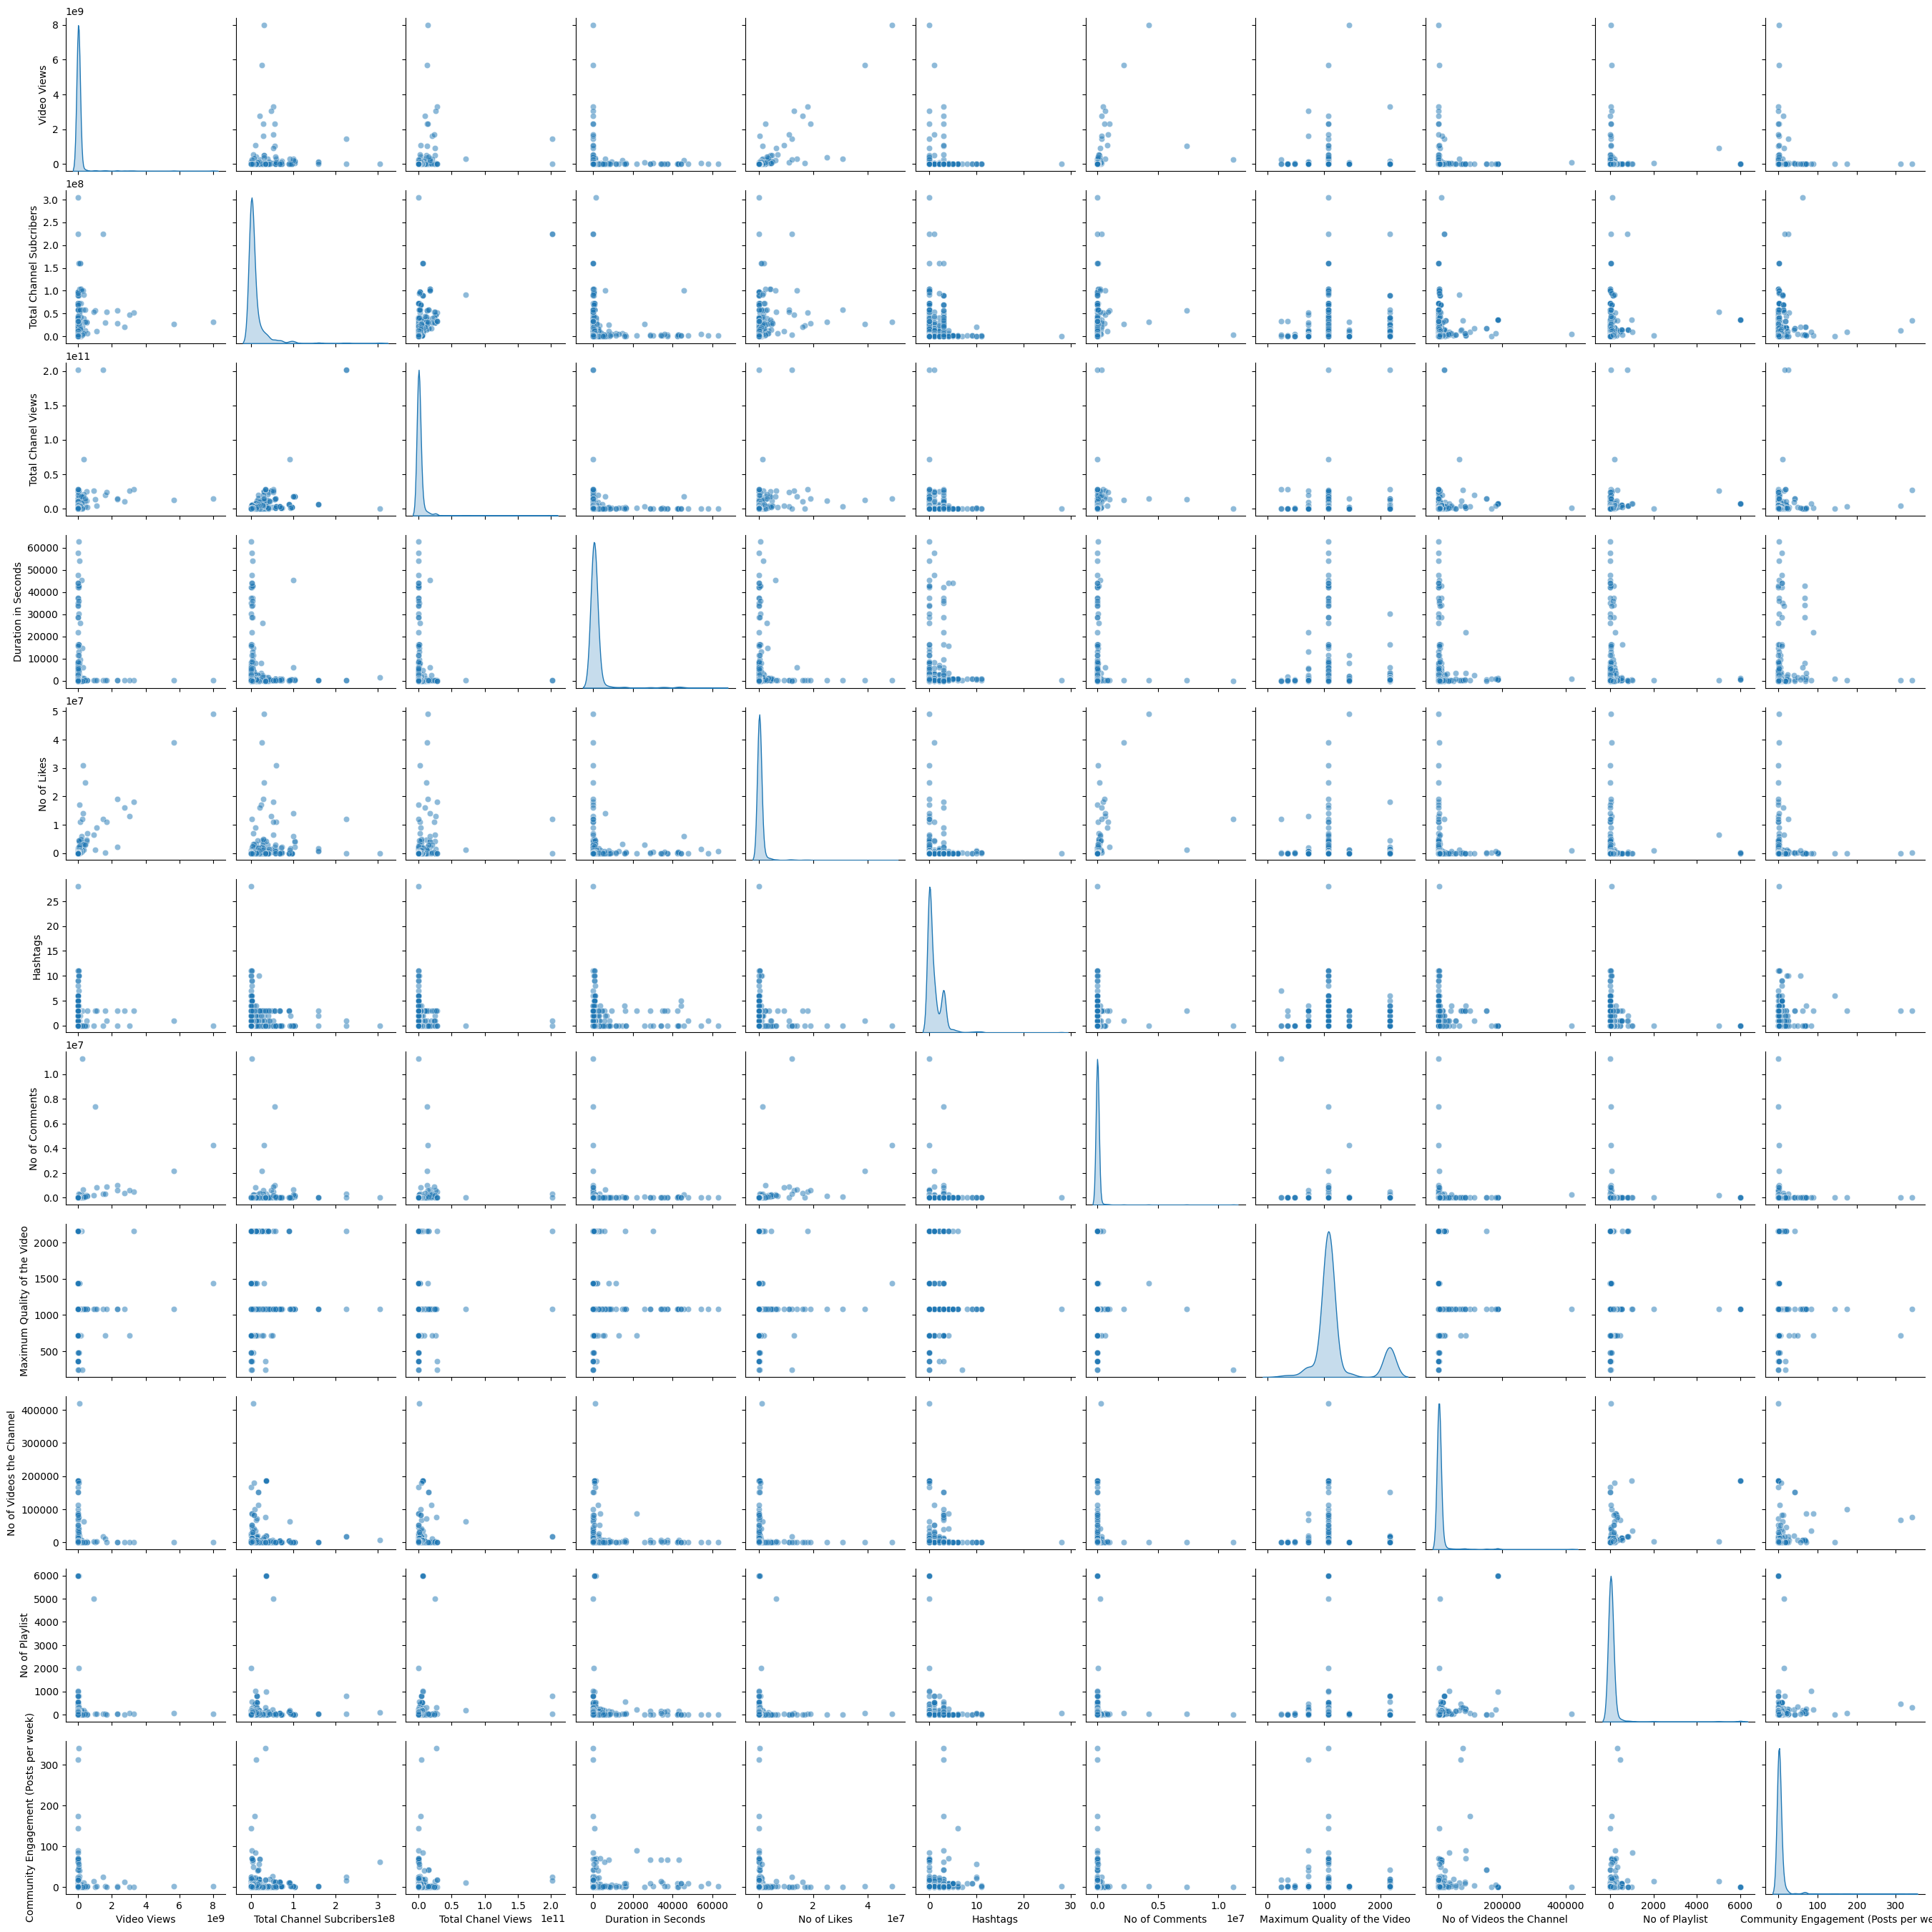

In [114]:
import seaborn as sns

numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
sns.pairplot(df[numerical_columns], diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})

In [115]:
import numpy as np
log_numeric_columns = []
for col in numerical_columns:
    df[f'Log {col}'] = np.log(df[col].replace(0, np.nan))
    log_numeric_columns.append(f'Log {col}')

df[log_numeric_columns].head()

Log Video Views  Log Total Channel Subcribers  Log Total Chanel Views  \
0        11.891766                     10.601622               15.890478   
1        12.354359                     13.732129               18.739394   
2         6.777647                      6.126869               11.197461   
3         9.206834                     14.334304               20.110137   
4        17.498889                     16.308716               22.004337   

   Log Duration in Seconds  Log No of Likes  Log Hashtags  Log No of Comments  \
0                 7.518064         8.809863           NaN            6.037871   
1                 6.761573         8.961879           0.0            5.241747   
2                 6.198479         6.754604           NaN                 NaN   
3                 4.189655         5.236442           NaN            4.343805   
4                 6.131226        13.711261           NaN           10.247822   

   Log Maximum Quality of the Video  Log No of Videos the Channel  \
0                          6.984716                      6.135565   
1                          6.984716                      5.525453   
2                          6.579251                      5.062595   
3                          6.984716                     10.747401   
4                          6.984716                      7.962764   

   Log No of Playlist  Log Community Engagement (Posts per week)  
0            2.484907                                   0.000000  
1            2.484907                                   0.693147  
2                 NaN                                        NaN  
3            3.871201                                   2.995732  
4            4.727388                                   0.000000

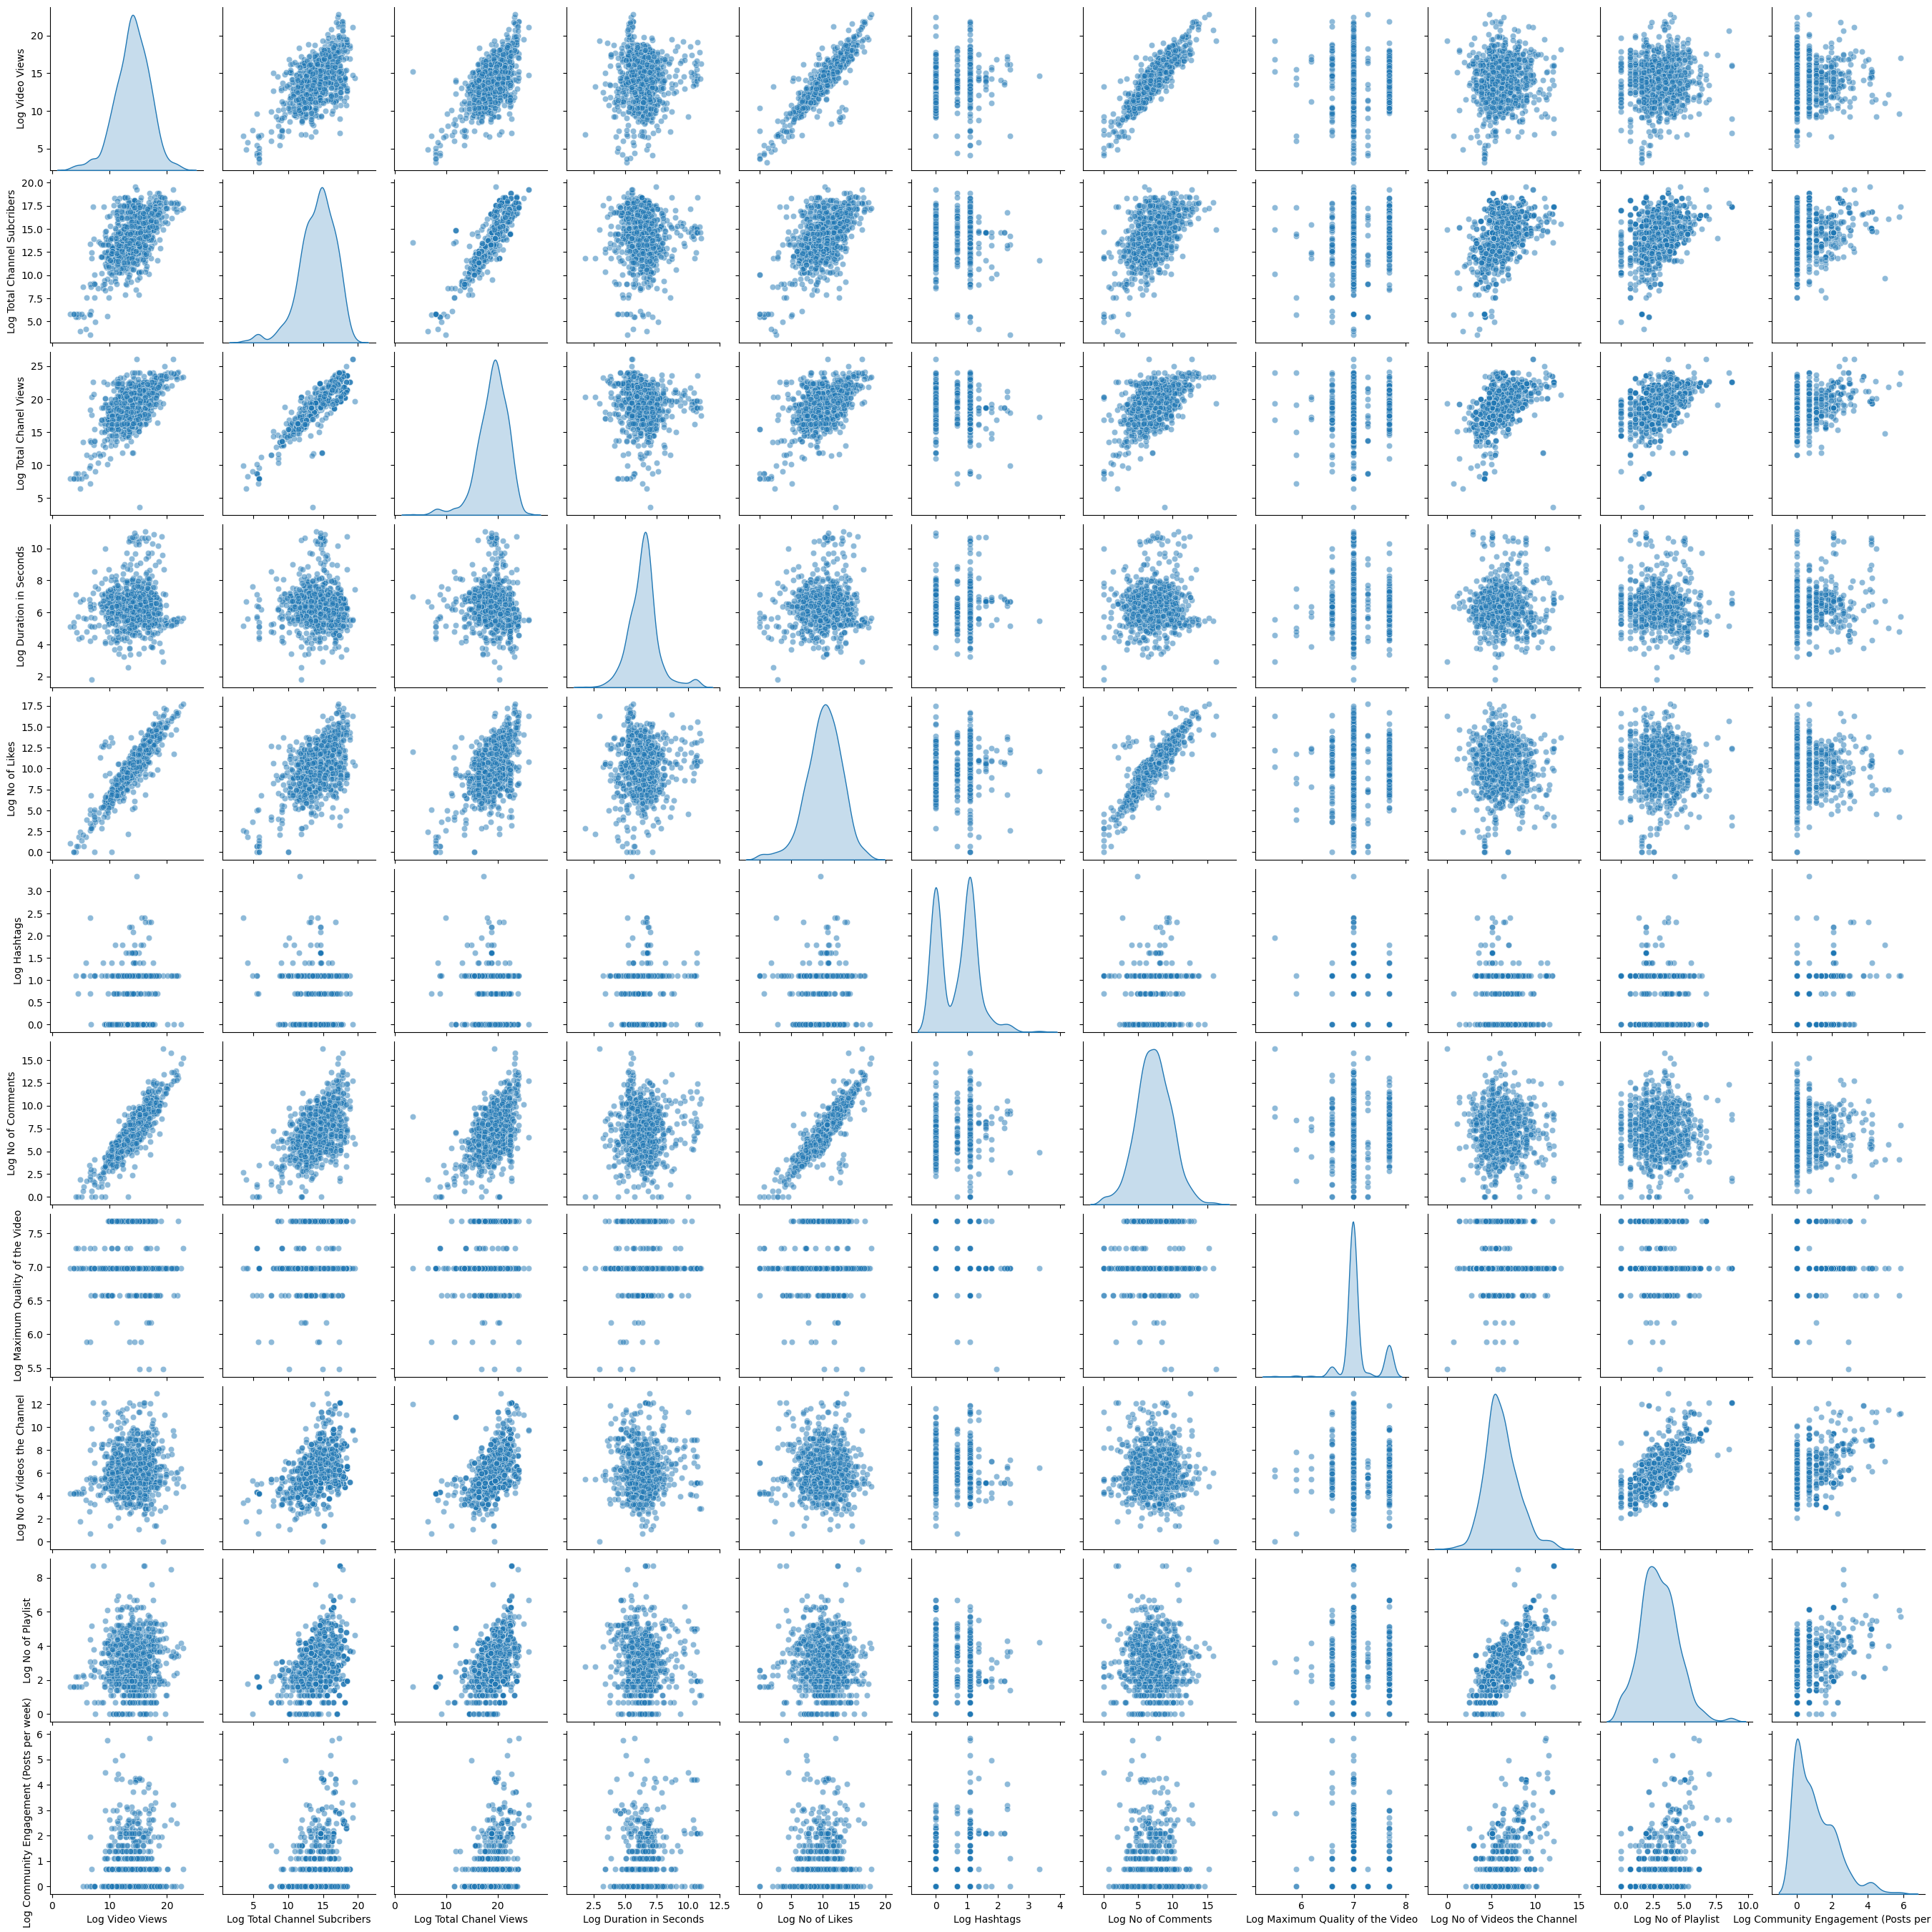

In [116]:
sns.pairplot(df[log_numeric_columns], diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})

<Axes: >

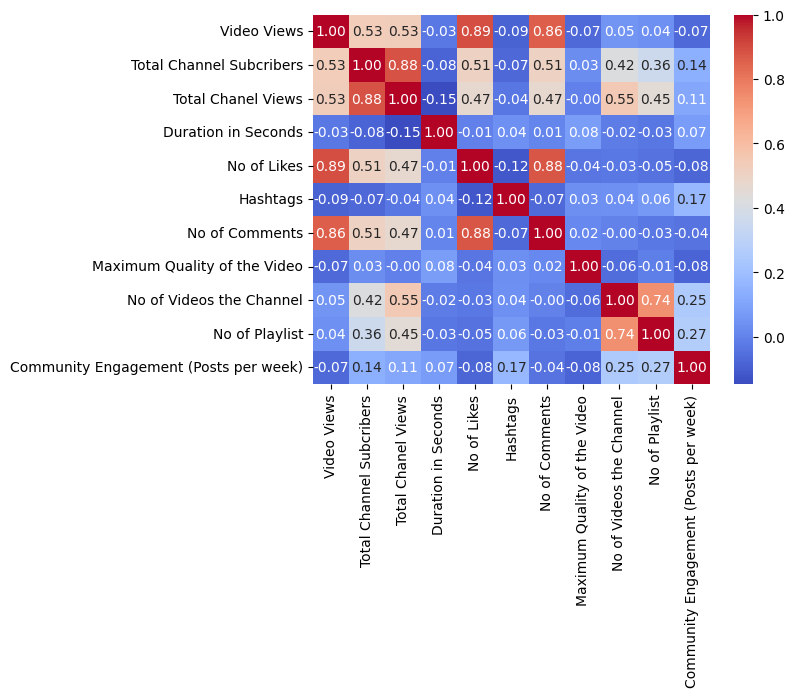

In [117]:
sns.heatmap(df[numerical_columns].corr("spearman"), annot=True, cmap='coolwarm', fmt='.2f')

zamanı bucketla ona göre izlenmelerin daüılımna bak
cinsiyete göre izlenme dağılımına bak
premier durumuna göre izlenme dağılımına bak

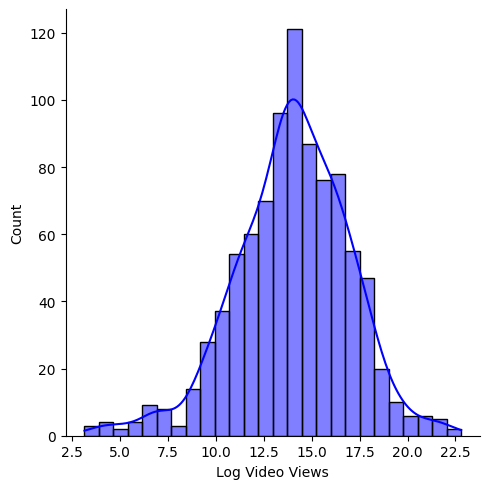

In [118]:

sns.displot(df['Log Video Views'].dropna(), kde=True, color='blue')

In [119]:
# First, we need to calculate our IQR.
q1 = df["Log Video Views"].quantile(0.25)                 
q3 = df["Log Video Views"].quantile(0.75)
iqr = q3 - q1

# Now let's calculate upper and lower bounds.
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

# Let us create our bins:
num_bins = 5
bin_width = (upper - lower) / num_bins
bins = [lower + i*bin_width for i in range(num_bins)]
bins += [upper, float('inf')]  # Now we add our last bin, which will contain any value greater than the upper-bound of the IQR.

# Let us create our labels:
labels = [f'Bucket {i}' for i in range(1,num_bins+1)]
labels.append('Outside IQR')

# Finally, we add a new column to the df:
df['Log Video Views Bucket'] = pd.cut(df["Log Video Views"], bins=bins, labels=labels)
df[["Log Video Views",'Log Video Views Bucket']]

Log Video Views Log Video Views Bucket
0          11.891766               Bucket 2
1          12.354359               Bucket 2
2           6.777647               Bucket 1
3           9.206834               Bucket 1
4          17.498889               Bucket 4
..               ...                    ...
900         8.838117               Bucket 1
901         9.714383               Bucket 2
902        10.398123               Bucket 2
903         7.315218               Bucket 1
904        12.971461               Bucket 3

[905 rows x 2 columns]

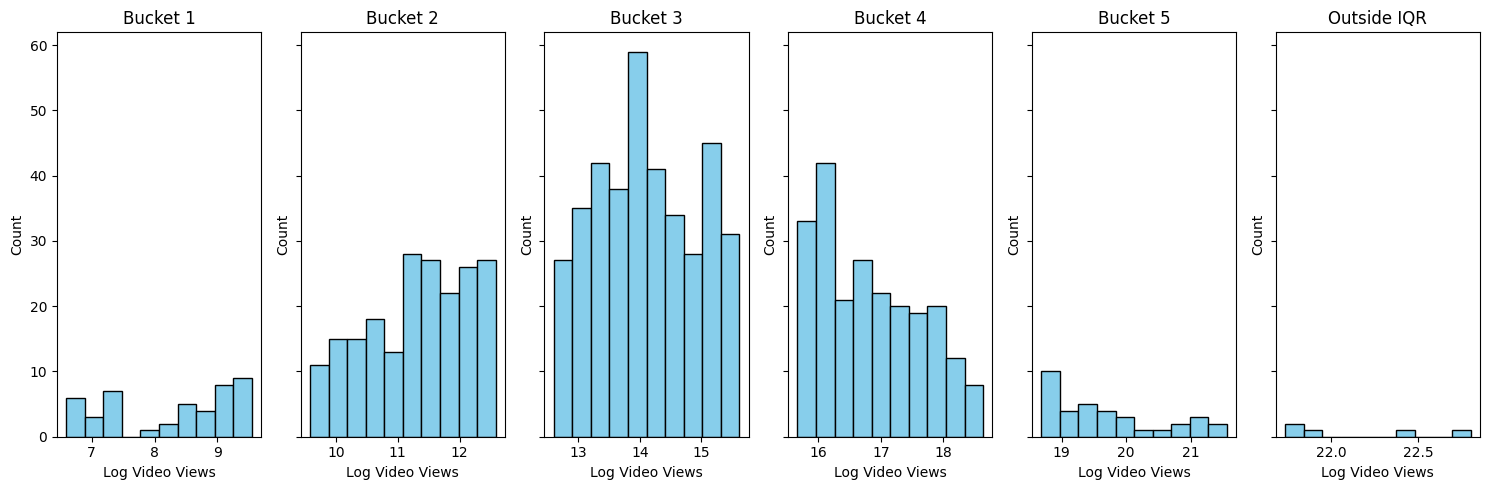

In [120]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(labels), figsize=(15, 5), sharey=True)
for i, label in enumerate(labels):
    ax = axes[i]
    subset = df[df['Log Video Views Bucket'] == label]['Log Video Views']
    ax.hist(subset, bins=10, color='skyblue', edgecolor='black')
    ax.set_title(label)
    ax.set_xlabel('Log Video Views')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


Log Video Views Bucket
Bucket 1       0
Bucket 2       0
Bucket 3       1
Bucket 4       0
Bucket 5       0
Outside IQR    0
Name: count, dtype: int64

/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_53792/2945177696.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_sums = df.groupby('Log Video Views Bucket')['Log Video Views'].sum().reindex(labels).copy()


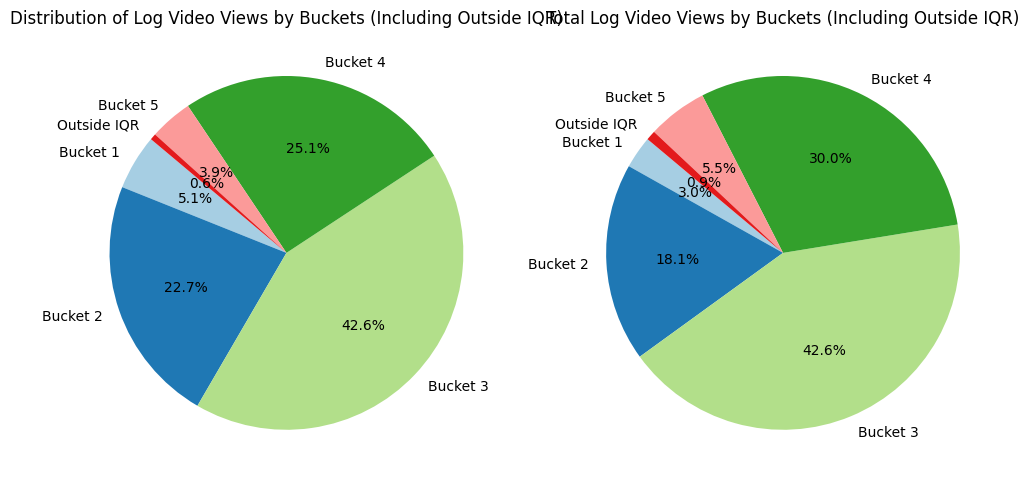

In [158]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

bucket_counts = df['Log Video Views Bucket'].value_counts().reindex(labels).copy()
bucket_sums = df.groupby('Log Video Views Bucket')['Log Video Views'].sum().reindex(labels).copy()

# Pie chart for bucket counts
axes[0].pie(bucket_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title('Distribution of Log Video Views by Buckets (Including Outside IQR)')

# Pie chart for bucket sums
axes[1].pie(bucket_sums, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title('Total Log Video Views by Buckets (Including Outside IQR)')

plt.tight_layout()
plt.show()

In [162]:
bucket_sums/bucket_counts

Log Video Views Bucket
Bucket 1        8.281712
Bucket 2       11.301389
Bucket 3       14.108576
Bucket 4       16.843293
Bucket 5       19.686324
Outside IQR    22.148753
dtype: float64

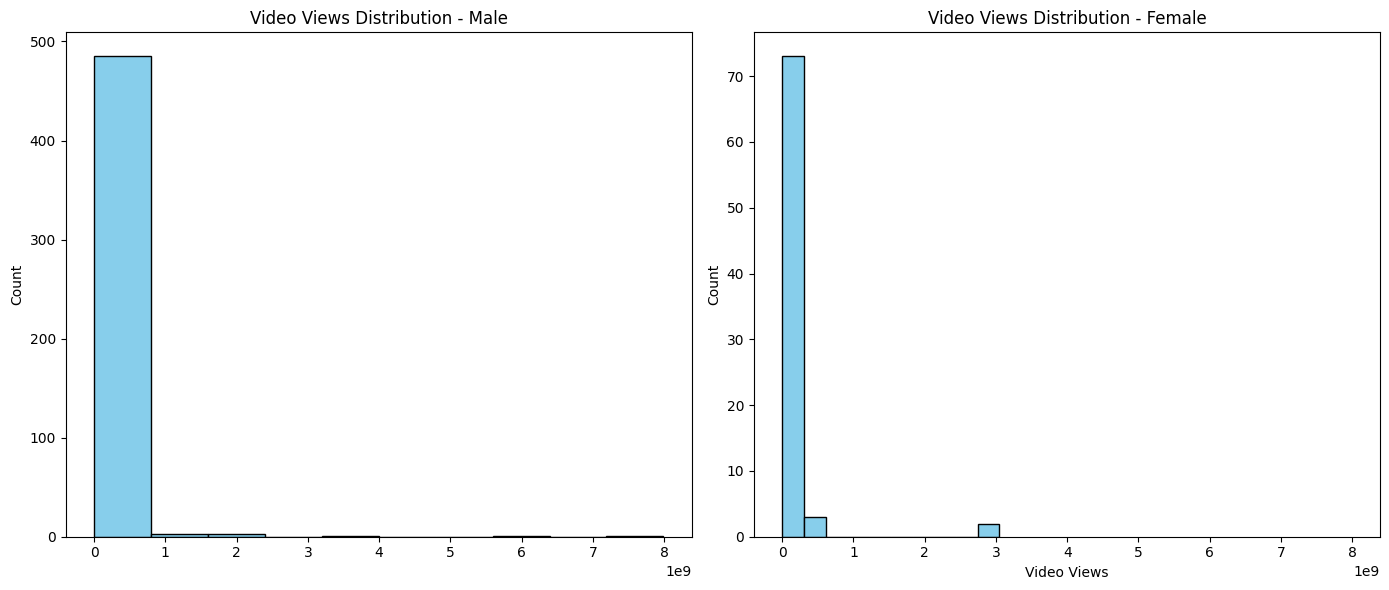

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

genders = df['Creator Gender'].dropna().unique()
for ax, gender in zip(axes, genders):
    subset = df[df['Creator Gender'] == gender]['Video Views']
    ax.hist(subset, bins=10, color='skyblue', edgecolor='black')
    ax.set_title(f'Video Views Distribution - {gender}')
    ax.set_ylabel('Count')
axes[-1].set_xlabel('Video Views')
plt.tight_layout()
plt.show()

/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_53792/3840942758.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_sums = gender_df.groupby('Log Video Views Bucket')['Log Video Views'].sum().reindex(labels)
/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_53792/3840942758.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_sums = gender_df.groupby('Log Video Views Bucket')['Log Video Views'].sum().reindex(labels)
/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_53792/3840942758.py:11: FutureWarning: The default of observed=False is deprecated and will be change

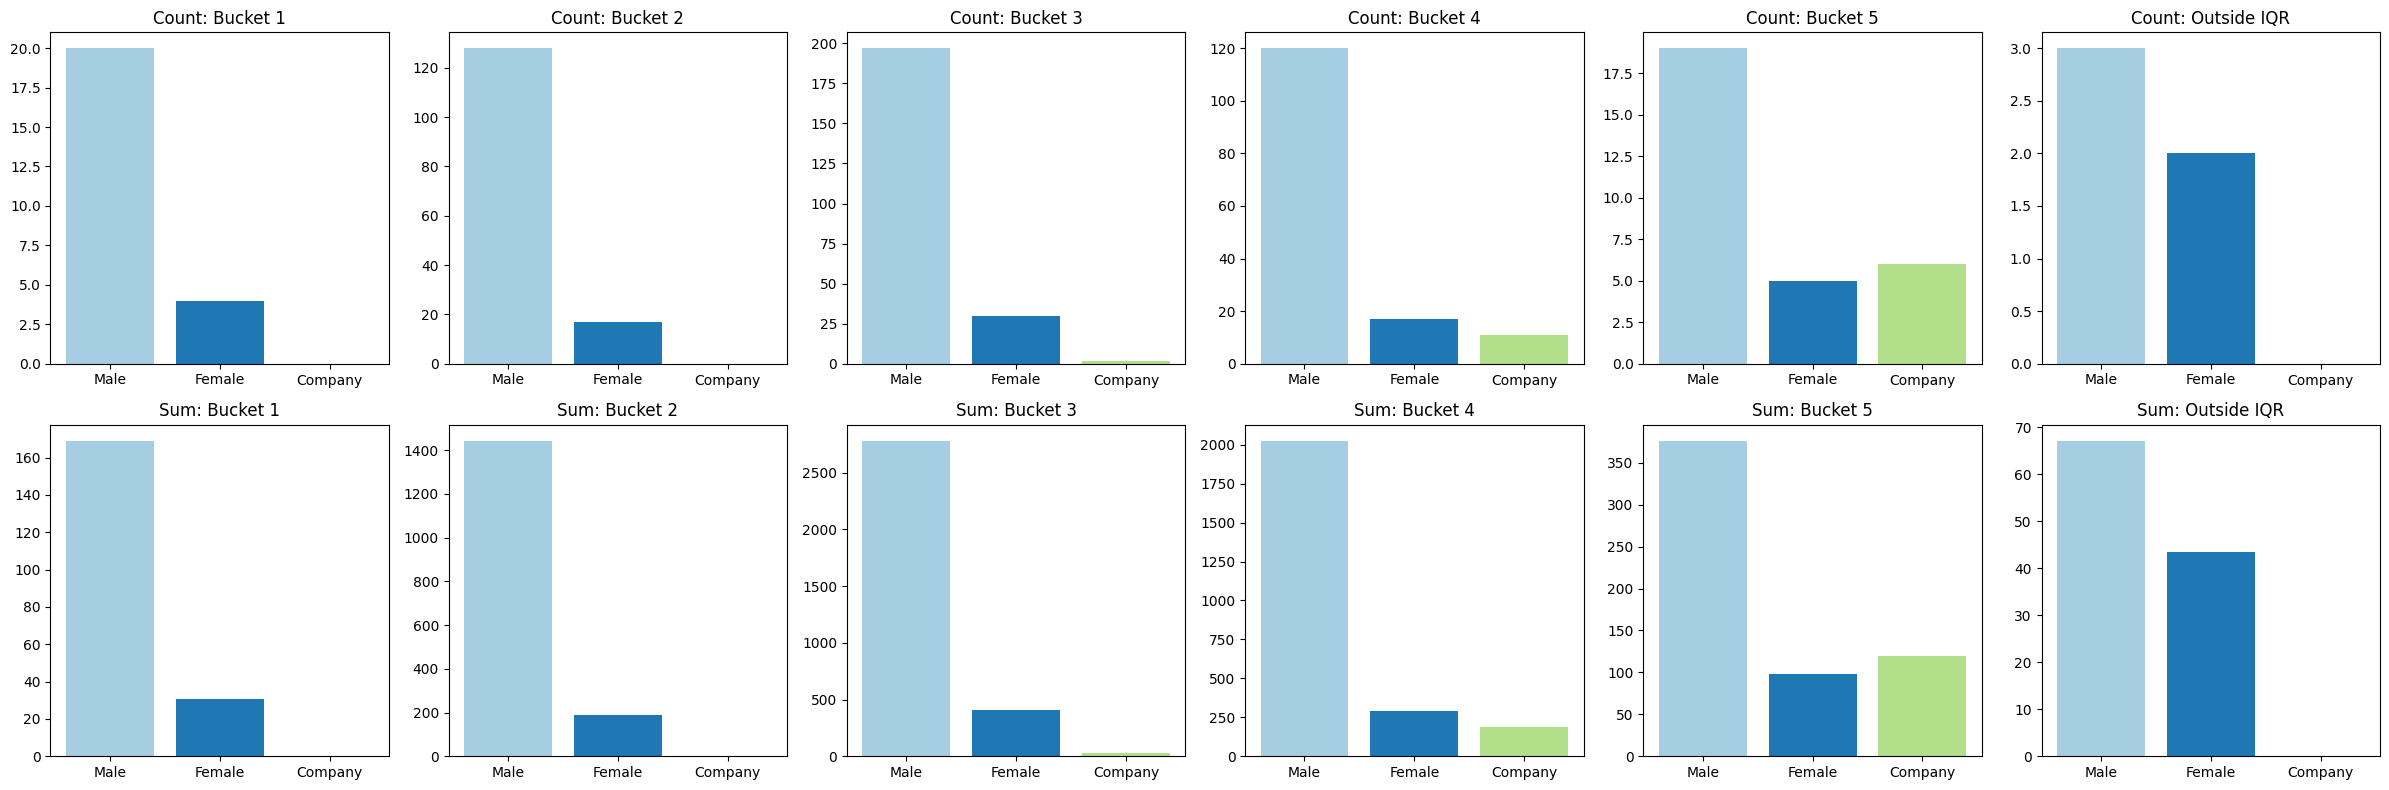

In [123]:

fig, axes = plt.subplots(2, len(labels), figsize=(24, 8))

for row, stat in enumerate(['count', 'sum']):
    for col, label in enumerate(labels):
        for gender in genders:
            gender_df = df[df['Creator Gender'] == gender]
            if stat == 'count':
                bucket_counts = gender_df['Log Video Views Bucket'].value_counts().reindex(labels)
                value = bucket_counts[label]
            else:
                bucket_sums = gender_df.groupby('Log Video Views Bucket')['Log Video Views'].sum().reindex(labels)
                value = bucket_sums[label]
            axes[row, col].bar(gender, value, color=plt.cm.Paired.colors[list(genders).index(gender)])
        axes[row, col].set_title(f"{stat.capitalize()}: {label}")

plt.tight_layout()
plt.show()


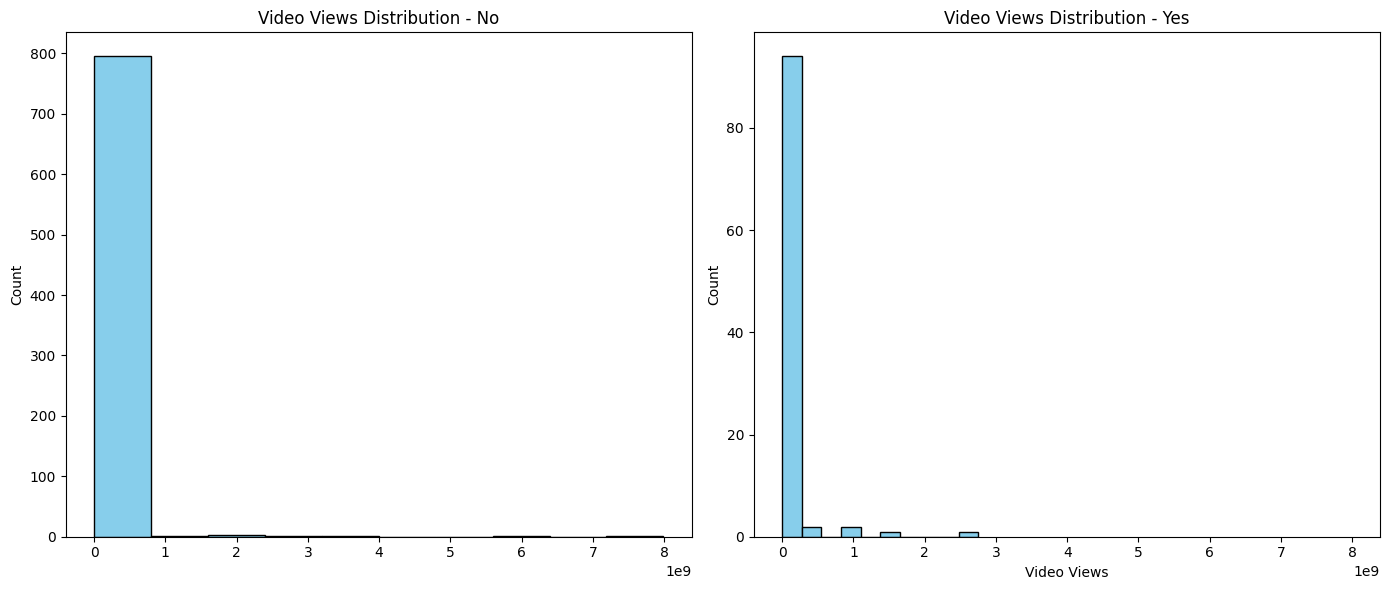

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

premiere_status = df['Premiered or Not'].dropna().unique()
for ax, status in zip(axes, premiere_status):
    subset = df[df['Premiered or Not'] == status]['Video Views']
    ax.hist(subset, bins=10, color='skyblue', edgecolor='black')
    ax.set_title(f'Video Views Distribution - {status}')
    ax.set_ylabel('Count')
axes[-1].set_xlabel('Video Views')
plt.tight_layout()
plt.show()


/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_53792/3330684935.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_sums = pre_df.groupby('Log Video Views Bucket')['Log Video Views'].sum().reindex(labels)
/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_53792/3330684935.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_sums = pre_df.groupby('Log Video Views Bucket')['Log Video Views'].sum().reindex(labels)
/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_53792/3330684935.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to T

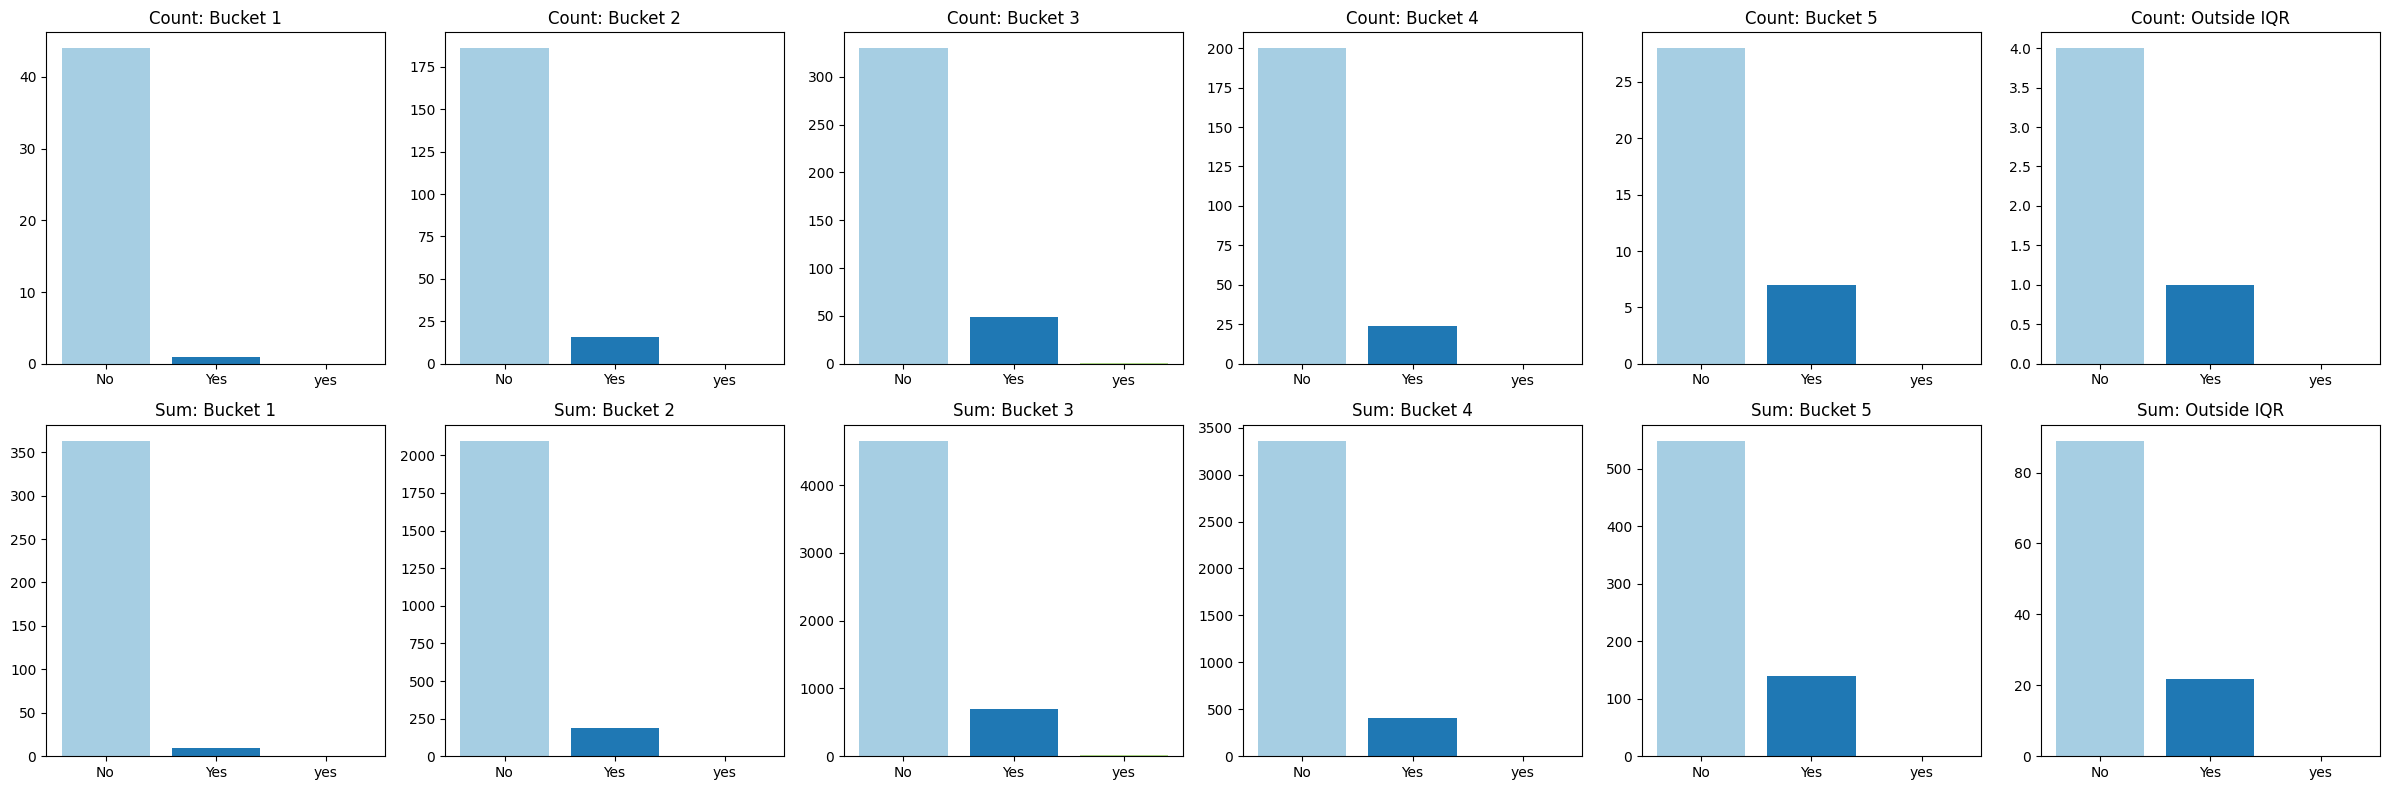

In [125]:
fig, axes = plt.subplots(2, len(labels), figsize=(24, 8))
premiere = df['Premiered or Not'].dropna().unique()
for row, stat in enumerate(['count', 'sum']):
    for col, label in enumerate(labels):
        for pre in premiere:
            pre_df = df[df['Premiered or Not'] == pre]
            if stat == 'count':
                bucket_counts = pre_df['Log Video Views Bucket'].value_counts().reindex(labels)
                value = bucket_counts[label]
            else:
                bucket_sums = pre_df.groupby('Log Video Views Bucket')['Log Video Views'].sum().reindex(labels)
                value = bucket_sums[label]
            axes[row, col].bar(pre, value, color=plt.cm.Paired.colors[list(premiere).index(pre)])
        axes[row, col].set_title(f"{stat.capitalize()}: {label}")

plt.tight_layout()
plt.show()


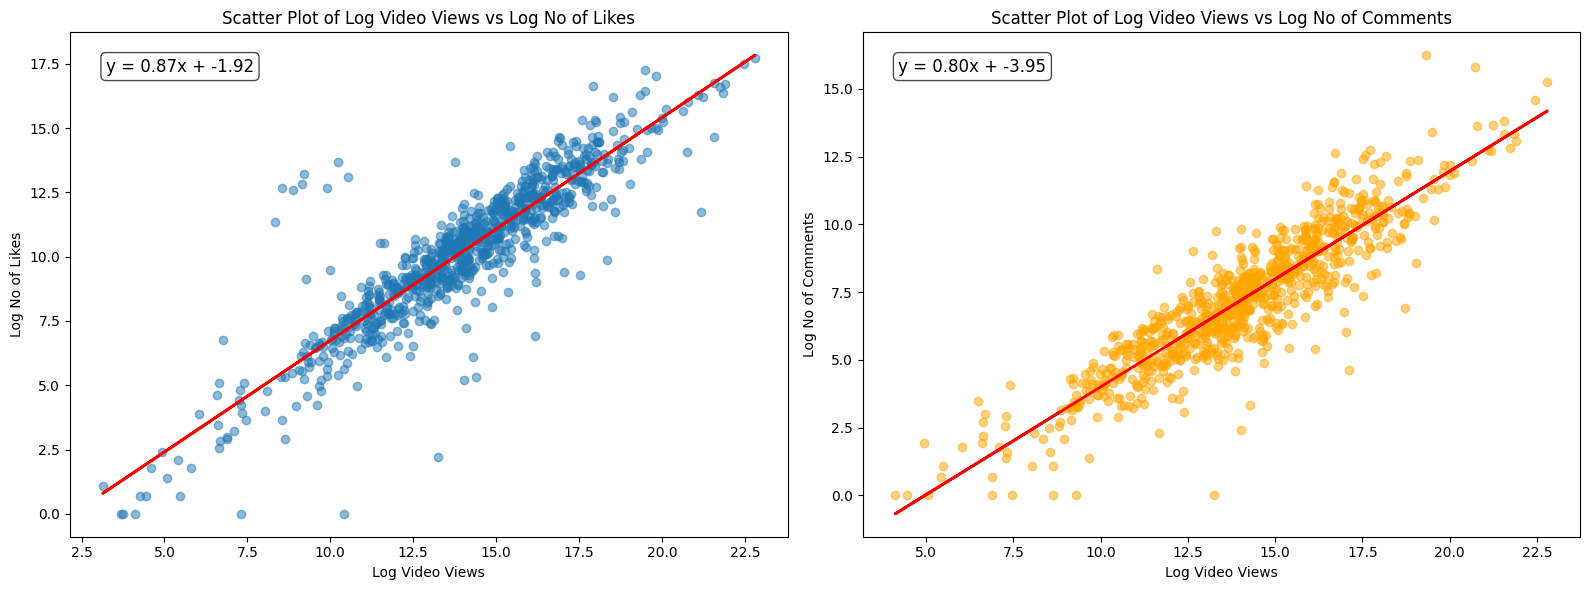

In [126]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot: Log Video Views vs Log No of Likes
axs[0].scatter(df['Log Video Views'], df['Log No of Likes'], alpha=0.5)
axs[0].set_xlabel('Log Video Views')
axs[0].set_ylabel('Log No of Likes')
axs[0].set_title('Scatter Plot of Log Video Views vs Log No of Likes')

# Add trend line
mask0 = df['Log Video Views'].notnull() & df['Log No of Likes'].notnull()
x = df.loc[mask0, 'Log Video Views']
y = df.loc[mask0, 'Log No of Likes']
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
axs[0].plot(x, m*x + c, color='red', linewidth=2)
# Show formula on the plot
axs[0].text(
    0.05, 0.95,
    f'y = {m:.2f}x + {c:.2f}',
    transform=axs[0].transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
)

# Scatter plot: Log Video Views vs Log No of Comments
axs[1].scatter(df['Log Video Views'], df['Log No of Comments'], alpha=0.5, color='orange')
axs[1].set_xlabel('Log Video Views')
axs[1].set_ylabel('Log No of Comments')
axs[1].set_title('Scatter Plot of Log Video Views vs Log No of Comments')

# Add trend line
mask1 = df['Log Video Views'].notnull() & df['Log No of Comments'].notnull()
x = df.loc[mask1, 'Log Video Views']
y = df.loc[mask1, 'Log No of Comments']
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
axs[1].plot(x, m*x + c, color='red', linewidth=2)
# Show formula on the plot
axs[1].text(
    0.05, 0.95,
    f'y = {m:.2f}x + {c:.2f}',
    transform=axs[1].transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
)


plt.tight_layout()
plt.show()

In [127]:
df_trend_likes = df[df["Log Video Views"]*0.87 -1.92 < df["Log No of Likes"]]
df_trend_comments = df[df["Log Video Views"]*0.80 -3.95 < df["Log No of Comments"]]


In [128]:
df_joined = df.groupby("Creator Name")["Video Title"].count().sort_values(ascending=False).to_frame(name='Video Count').join(
    df_trend_likes.groupby("Creator Name")["Video Title"].count().rename('Trend Likes Count'),
    how='left'
).fillna(0)

df_joined = df_joined.join(
    df_trend_comments.groupby("Creator Name")["Video Title"].count().rename('Trend Comments Count'),
    how='left'
).fillna(0)

df_joined['Trend Likes Ratio'] = df_joined['Trend Likes Count'] / df_joined['Video Count']
df_joined['Trend Comments Ratio'] = df_joined['Trend Comments Count'] / df_joined['Video Count']
df_joined.sort_values(by=[ 'Trend Likes Ratio','Video Count'], ascending=[False, False]).head(10)

Video Count  Trend Likes Count  Trend Comments Count  \
Creator Name                                                                 
Tanmay Singh                    6                6.0                   6.0   
Zakir Khan                      6                6.0                   2.0   
Rahul M                         6                6.0                   6.0   
Jay Shetty                      5                5.0                   0.0   
The Screen Patti                5                5.0                   4.0   
Hari baskar                     5                5.0                   5.0   
Marvel Entertainment            5                5.0                   5.0   
Sri Ram                         5                5.0                   2.0   
Chris Heria                     5                5.0                   1.0   
Tharum Kumar                    5                5.0                   4.0   

                      Trend Likes Ratio  Trend Comments Ratio  
Creator Name                                                   
Tanmay Singh                        1.0              1.000000  
Zakir Khan                          1.0              0.333333  
Rahul M                             1.0              1.000000  
Jay Shetty                          1.0              0.000000  
The Screen Patti                    1.0              0.800000  
Hari baskar                         1.0              1.000000  
Marvel Entertainment                1.0              1.000000  
Sri Ram                             1.0              0.400000  
Chris Heria                         1.0              0.200000  
Tharum Kumar                        1.0              0.800000

In [129]:
df.columns

Index(['Video Views', 'Video Title', 'Channel URL', 'Creator Name',
       'Creator Gender', 'Total Channel Subcribers', 'Total Chanel Views',
       'Duration of Video', 'Duration in Seconds', 'Date of Video Upload',
       'No of Likes', 'Language of the Video', 'Subtitle', 'Video Description',
       'Hashtags', 'No of Comments', 'Date of the Last Comment',
       'Maximum Quality of the Video', 'No of Videos the Channel',
       'No of Playlist', 'Premiered or Not',
       'Community Engagement (Posts per week)', 'Log Video Views',
       'Log Total Channel Subcribers', 'Log Total Chanel Views',
       'Log Duration in Seconds', 'Log No of Likes', 'Log Hashtags',
       'Log No of Comments', 'Log Maximum Quality of the Video',
       'Log No of Videos the Channel', 'Log No of Playlist',
       'Log Community Engagement (Posts per week)', 'Log Video Views Bucket'],
      dtype='object')

In [130]:
df['Like Score'] = df['Log No of Likes'] / df['Log Video Views']
df['Comment Score'] = df['Log No of Comments'] / df['Log Video Views']



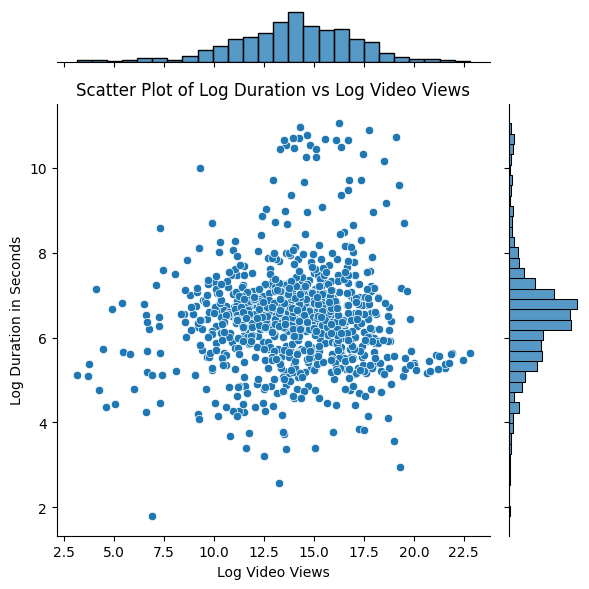

In [131]:
import matplotlib.pyplot as plt

sns.jointplot(data=df, x="Log Video Views", y="Log Duration in Seconds")

plt.ylabel('Log Duration in Seconds')
plt.xlabel('Log Video Views')
plt.title('Scatter Plot of Log Duration vs Log Video Views')



plt.tight_layout()
plt.show()

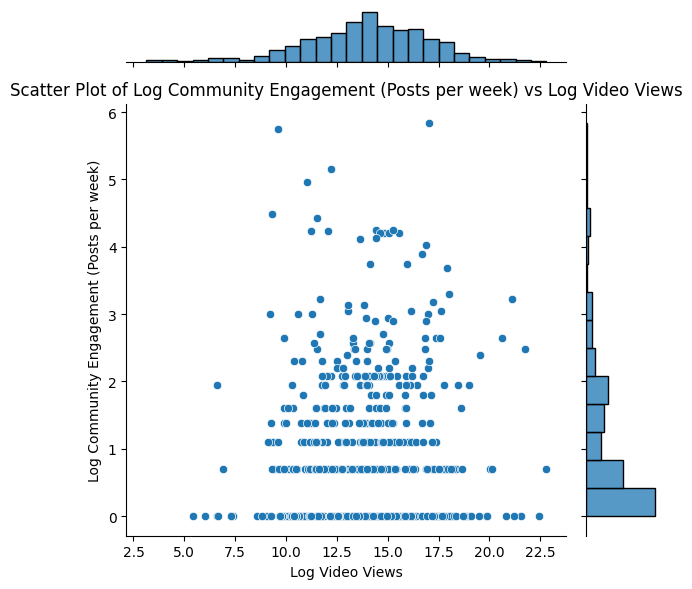

In [132]:
import matplotlib.pyplot as plt

sns.jointplot(data=df, x="Log Video Views", y="Log Community Engagement (Posts per week)")

plt.ylabel('Log Community Engagement (Posts per week)')
plt.xlabel('Log Video Views')
plt.title('Scatter Plot of Log Community Engagement (Posts per week) vs Log Video Views')



plt.tight_layout()
plt.show()

In [133]:
df.sort_values(by='Date of Video Upload', ascending=True,inplace=True)

In [134]:
df.groupby("Channel URL")["Log Video Views"].apply(lambda x: x.shift().expanding().mean()).tail(10)

Channel URL                                  
https://www.youtube.com/user/pibindia     772          NaN
https://www.youtube.com/user/sonyliv      222          NaN
https://www.youtube.com/user/steviecutts  157          NaN
https://www.youtube.com/variant           340          NaN
https://youtu.be/d72vXhJDE6M              573          NaN
illacertus - YouTube                      435          NaN
                                          53     14.264001
                                          94     15.240284
                                          439    14.503257
youtube.com/c/Thequint                    653          NaN
Name: Log Video Views, dtype: float64

In [135]:
df.columns

Index(['Video Views', 'Video Title', 'Channel URL', 'Creator Name',
       'Creator Gender', 'Total Channel Subcribers', 'Total Chanel Views',
       'Duration of Video', 'Duration in Seconds', 'Date of Video Upload',
       'No of Likes', 'Language of the Video', 'Subtitle', 'Video Description',
       'Hashtags', 'No of Comments', 'Date of the Last Comment',
       'Maximum Quality of the Video', 'No of Videos the Channel',
       'No of Playlist', 'Premiered or Not',
       'Community Engagement (Posts per week)', 'Log Video Views',
       'Log Total Channel Subcribers', 'Log Total Chanel Views',
       'Log Duration in Seconds', 'Log No of Likes', 'Log Hashtags',
       'Log No of Comments', 'Log Maximum Quality of the Video',
       'Log No of Videos the Channel', 'Log No of Playlist',
       'Log Community Engagement (Posts per week)', 'Log Video Views Bucket',
       'Like Score', 'Comment Score'],
      dtype='object')

In [136]:
df["Mean Log Views Until Then"] = (
    df.groupby("Channel URL")["Log Video Views"].transform(lambda x: x.expanding().mean())
)

# 5. İlgili 3 sütunu seç

df[["Channel URL","Date of Video Upload" ,"Log Video Views", "Mean Log Views Until Then", "Log Total Channel Subcribers"]].sort_values(by=["Channel URL", "Date of Video Upload"])

Channel URL Date of Video Upload  \
611  (1) Dr. Vivek Bindra: Motivational Speaker - Y...           2019-04-26   
602                        (1290) Round2hell - YouTube           2018-03-11   
774             (13) Village Cooking Channel - YouTube           2020-03-13   
780                     (14) Mr.Heang Update - YouTube           2022-05-05   
658                      (14) RC MEDIA WORLD - YouTube           2020-11-01   
..                                                 ...                  ...   
435                               illacertus - YouTube           2016-10-03   
53                                illacertus - YouTube           2017-02-03   
94                                illacertus - YouTube           2017-04-29   
439                               illacertus - YouTube           2019-01-02   
653                             youtube.com/c/Thequint           2022-04-02   

     Log Video Views  Mean Log Views Until Then  Log Total Channel Subcribers  
611        16.877023                  16.877023                     16.801192  
602        18.511919                  18.511919                     17.129697  
774        18.684983                  18.684983                     16.705882  
780        19.657930                  19.657930                     15.782623  
658        18.208104                  18.208104                     14.719729  
..               ...                        ...                           ...  
435        14.264001                  14.264001                     13.030248  
53         16.216568                  15.240284                     13.030248  
94         13.029201                  14.503257                     13.030248  
439        14.682783                  14.548138                     13.030248  
653        13.933039                  13.933039                     15.053885  

[905 rows x 5 columns]

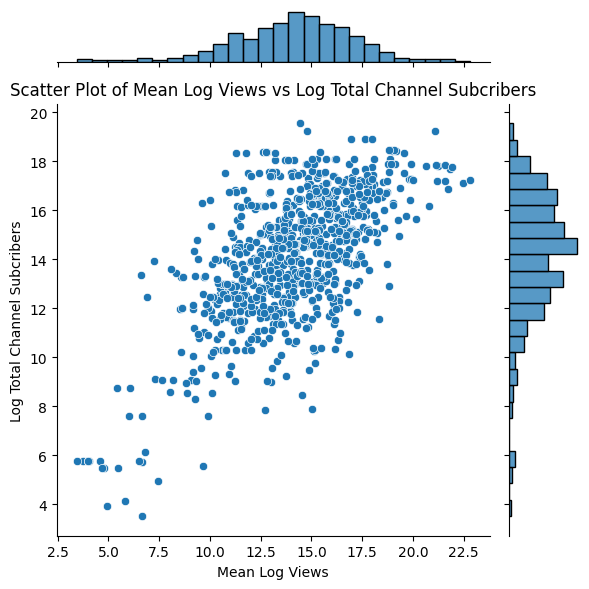

In [137]:
sns.jointplot(data=df, x="Mean Log Views Until Then", y="Log Total Channel Subcribers")

plt.ylabel('Log Total Channel Subcribers')
plt.xlabel('Mean Log Views')
plt.title('Scatter Plot of Mean Log Views vs Log Total Channel Subcribers')



plt.tight_layout()
plt.show()

<Axes: xlabel='Loyalty Score', ylabel='Count'>

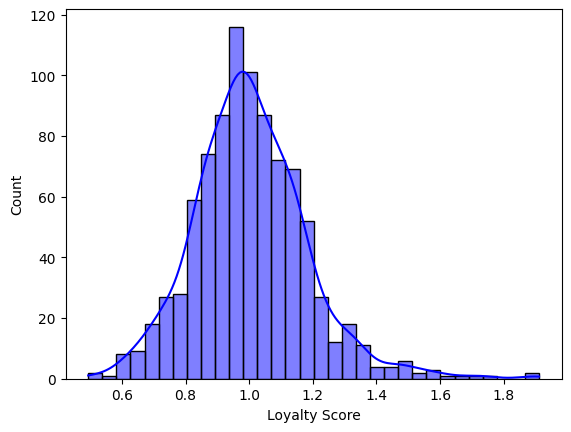

In [138]:
df["Loyalty Score"] =  df["Mean Log Views Until Then"] / df["Log Total Channel Subcribers"] 

sns.histplot(data=df, x="Loyalty Score", kde=True, color='blue')

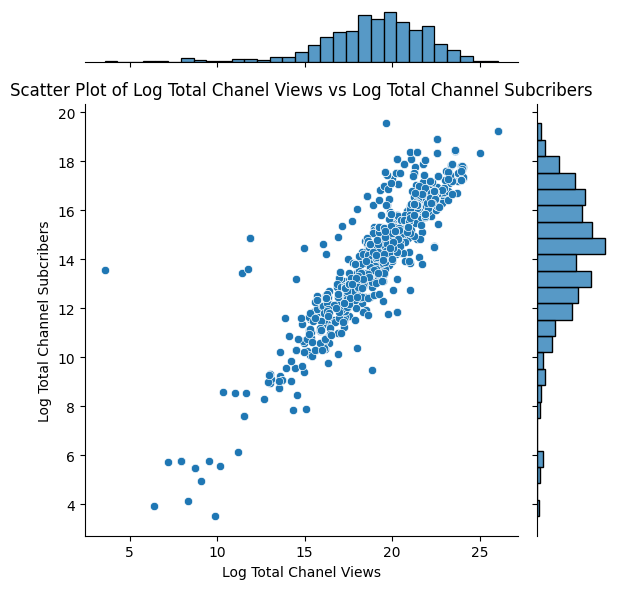

In [139]:
sns.jointplot(data=df, x="Log Total Chanel Views", y="Log Total Channel Subcribers")

plt.xlabel('Log Total Chanel Views')
plt.ylabel('Log Total Channel Subcribers')
plt.title('Scatter Plot of Log Total Chanel Views vs Log Total Channel Subcribers')



plt.tight_layout()
plt.show()

<Axes: xlabel='Atractness Score', ylabel='Count'>

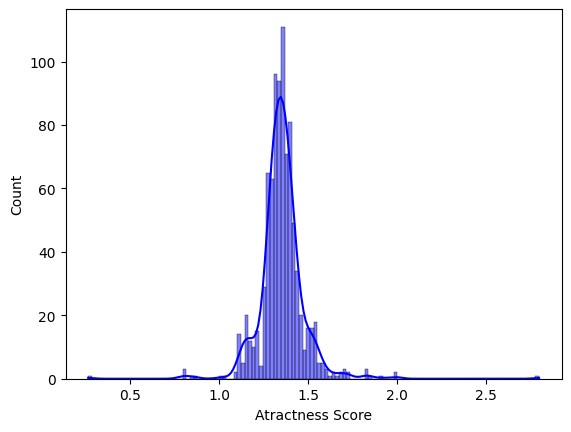

In [140]:
df["Atractness Score"] =  df["Log Total Chanel Views"] / df["Log Total Channel Subcribers"] 

sns.histplot(data=df, x="Atractness Score", kde=True, color='blue')

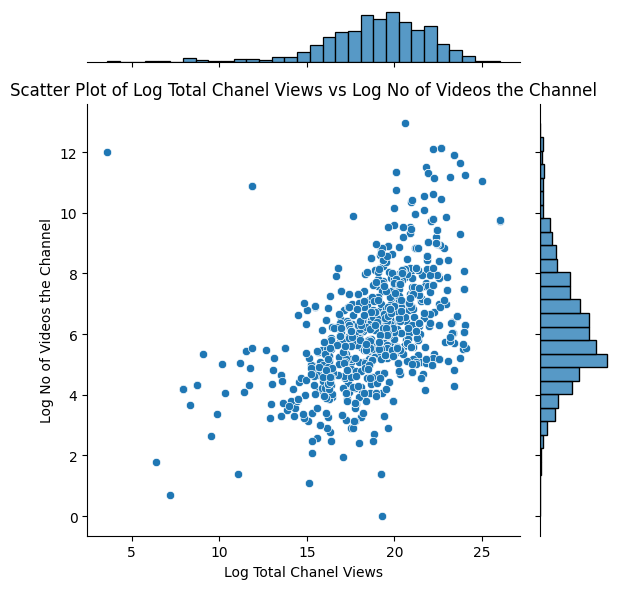

In [141]:
sns.jointplot(data=df, x="Log Total Chanel Views", y="Log No of Videos the Channel")

plt.xlabel('Log Total Chanel Views')
plt.ylabel('Log No of Videos the Channel')
plt.title('Scatter Plot of Log Total Chanel Views vs Log No of Videos the Channel')

plt.tight_layout()
plt.show()

<Axes: xlabel='Efficiency Score', ylabel='Count'>

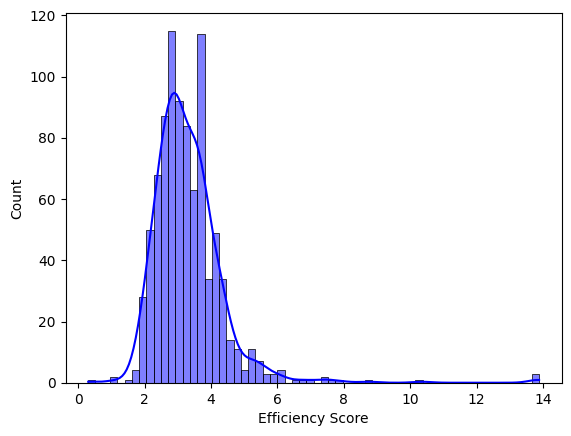

In [142]:
df["Efficiency Score"] =  df["Log Total Chanel Views"] / df["Log No of Videos the Channel"] 

sns.histplot(data=df, x="Efficiency Score", kde=True, color='blue')

In [163]:
df[["Creator Name","Efficiency Score"]].sort_values(by="Efficiency Score", ascending=False).head(10)

Creator Name  Efficiency Score
866                      Jawed               inf
317        Anubhav Singh Bassi         13.886011
814        Anubhav Singh Bassi         13.885159
319                 Blockshelf         13.784393
554            Udyansh Society         10.369597
784                 Court Room          8.764751
92   America Chowrasta FinTech          7.965034
157                Steve Cutts          7.554919
47                Varun Grover          7.493355
495               Rob Hamilton          7.352156

In [144]:
df.columns

Index(['Video Views', 'Video Title', 'Channel URL', 'Creator Name',
       'Creator Gender', 'Total Channel Subcribers', 'Total Chanel Views',
       'Duration of Video', 'Duration in Seconds', 'Date of Video Upload',
       'No of Likes', 'Language of the Video', 'Subtitle', 'Video Description',
       'Hashtags', 'No of Comments', 'Date of the Last Comment',
       'Maximum Quality of the Video', 'No of Videos the Channel',
       'No of Playlist', 'Premiered or Not',
       'Community Engagement (Posts per week)', 'Log Video Views',
       'Log Total Channel Subcribers', 'Log Total Chanel Views',
       'Log Duration in Seconds', 'Log No of Likes', 'Log Hashtags',
       'Log No of Comments', 'Log Maximum Quality of the Video',
       'Log No of Videos the Channel', 'Log No of Playlist',
       'Log Community Engagement (Posts per week)', 'Log Video Views Bucket',
       'Like Score', 'Comment Score', 'Mean Log Views Until Then',
       'Loyalty Score', 'Atractness Score', 'Efficien

In [145]:
df.to_csv("youtube_influencers_data_cleaned.csv", index=False)